In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

# Explore basic dataset statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Check class distribution (fraudulent vs. non-fraudulent)
print(data['Class'].value_counts())


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [3]:
data.shape

(284807, 31)

In [4]:
real = data[data.Class==0]
fraud = data[data.Class==1]
print(real.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [5]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [6]:
real_sample = real.sample(n=492) 

**Concatenating two Data Frames**

In [7]:
new_dataset = pd.concat([real_sample,fraud], axis=0)

In [8]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
241375,150998.0,-1.342444,-0.275057,2.219548,-0.299245,0.690724,-0.824135,-0.218631,0.162889,0.199458,...,0.238316,0.502313,-0.309059,0.019113,0.603695,0.512182,-0.014927,0.073377,9.99,0
234701,148074.0,0.907762,-3.606540,-1.279504,-1.055758,-1.940414,0.271050,-0.493081,-0.100268,-1.321226,...,-0.102502,-1.338384,-0.064124,0.672171,-0.854988,-0.695445,-0.096182,0.077959,692.24,0
51433,44942.0,-4.376483,-3.704106,1.187411,0.203134,3.596434,-0.610099,-2.194108,1.440114,-0.567951,...,0.309771,-0.838009,-0.022602,-1.361577,-0.253874,0.180096,-0.006307,-0.709867,7.00,0
192610,129777.0,-1.402911,-0.010972,-0.672736,-0.239898,-0.401491,-0.135797,1.709757,0.319532,-0.430126,...,0.133721,-0.331664,0.646357,-0.500263,0.051086,-0.056215,-0.118849,0.088178,375.82,0
62150,50155.0,1.268850,-1.292603,0.143128,-1.499148,-1.131979,-0.037999,-0.860091,-0.035934,-2.269893,...,-0.083620,-0.040775,-0.093546,-0.303697,0.338724,-0.181263,0.024969,0.021965,113.50,0


In [9]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [10]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [11]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93849.126016,0.189798,-0.090491,-0.036517,-0.055569,-0.043804,0.026644,-0.060233,0.009936,-0.006533,...,0.017174,0.015933,0.065158,0.022194,0.00449,0.014588,0.013639,-0.002281,0.023286,87.551301
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


Data preprocessing is crucial in credit card fraud detection to prepare and clean the data for accurate and effective modeling. It involves tasks like handling missing values, standardizing features, and removing duplicates to ensure that the machine learning algorithms can learn meaningful patterns and make reliable predictions. Without proper data preprocessing, the model's performance may be compromised due to noise or inconsistencies in the data.

In [12]:
# Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Remove duplicates (if any)
new_dataset = new_dataset.drop_duplicates()

# Standardize the 'Amount' column
scaler = StandardScaler()
new_dataset['Amount'] = scaler.fit_transform(new_dataset['Amount'].values.reshape(-1, 1))

# Split the data into features (X) and target (y)
X = new_dataset.drop('Class', axis=1)
y = new_dataset['Class']

In [13]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
241375  150998.0 -1.342444 -0.275057  2.219548 -0.299245  0.690724 -0.824135   
234701  148074.0  0.907762 -3.606540 -1.279504 -1.055758 -1.940414  0.271050   
51433    44942.0 -4.376483 -3.704106  1.187411  0.203134  3.596434 -0.610099   
192610  129777.0 -1.402911 -0.010972 -0.672736 -0.239898 -0.401491 -0.135797   
62150    50155.0  1.268850 -1.292603  0.143128 -1.499148 -1.131979 -0.037999   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [14]:
print(y)

241375    0
234701    0
51433     0
192610    0
62150     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 965, dtype: int64



Splitting the data into training and testing sets is essential in credit card fraud detection to assess how well the model generalizes to new, unseen data. It helps evaluate the model's performance and ensures it doesn't overfit (memorize) the training data, allowing us to measure its real-world effectiveness.

We built a machine learning model in this credit card fraud detection project to automate the process of identifying fraudulent transactions. The model leverages patterns and relationships in the data to distinguish between legitimate and fraudulent activities. This automation helps financial institutions and businesses detect fraud in real-time or during post-transaction analysis, improving security and reducing financial losses.

In [15]:
# Split the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

print(X.shape,X_train.shape, X_test.shape)
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

(965, 30) (772, 30) (193, 30)


RandomForestClassifier(random_state=42)

Accuracy is a measure of how many predictions your model got correct out of the total predictions. It represents the overall correctness of your model's predictions, but it may not be the best metric for imbalanced datasets where one class significantly outnumbers the other.

A confusion matrix is a table that helps you understand how well your model performed for each class. It breaks down predictions into four categories: true positives (correct positive predictions), true negatives (correct negative predictions), false positives (incorrect positive predictions), and false negatives (incorrect negative predictions). It provides insight into where your model is making mistakes.

The classification report provides a more detailed evaluation of your model's performance. It includes metrics like Precision, Recall (Sensitivity), F1-Score, and Support for each class.

Precision: Measures the accuracy of positive predictions.
Recall (Sensitivity): Measures the ability to identify all relevant instances in the positive class.
F1-Score: Balances Precision and Recall to provide a single score that considers both false positives and false negatives.
Support: The number of occurrences of each class in the test dataset.

In [16]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9326424870466321
Confusion Matrix:
[[95  3]
 [10 85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        98
           1       0.97      0.89      0.93        95

    accuracy                           0.93       193
   macro avg       0.94      0.93      0.93       193
weighted avg       0.93      0.93      0.93       193



Hyperparameter tuning in this credit card fraud detection project involved systematically searching and optimizing the hyperparameters (settings) of the machine learning model. By doing this, we aimed to enhance the model's performance. Specifically, hyperparameter tuning helps to find the best combination of settings that results in a more accurate and robust fraud detection model.

In [17]:
# Hyperparameter Tuning 
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


**What is the distribution of transaction amounts in the dataset?**

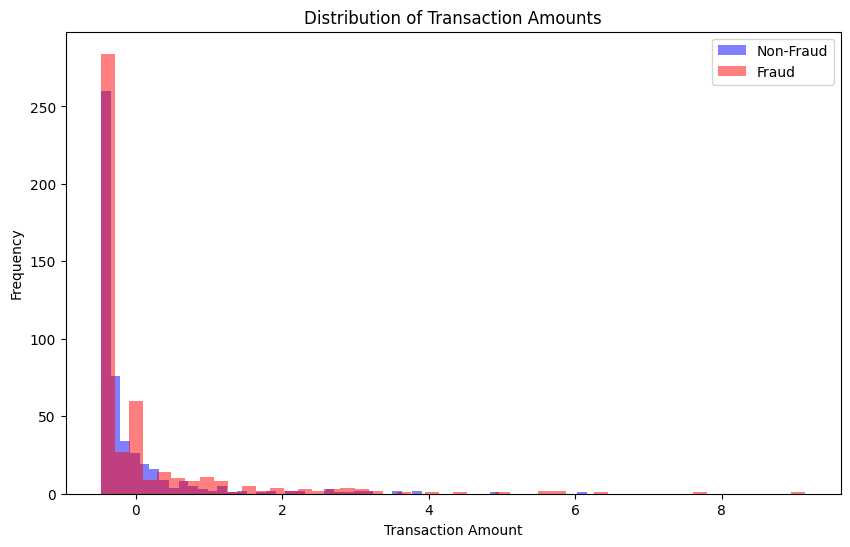

In [18]:
import matplotlib.pyplot as plt

# Plot the distribution of transaction amounts
plt.figure(figsize=(10, 6))
plt.hist(new_dataset[new_dataset['Class'] == 0]['Amount'], bins=50, alpha=0.5, label='Non-Fraud', color='blue')
plt.hist(new_dataset[new_dataset['Class'] == 1]['Amount'], bins=50, alpha=0.5, label='Fraud', color='red')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Distribution of Transaction Amounts')
plt.show()


**Are there any patterns in transaction timestamps related to fraud?**

We can visualize the transaction timestamps for both fraud and non-fraud cases to identify patterns. Here's an example using a KDE (Kernel Density Estimation) plot:

This plot can help you identify patterns in transaction timestamps for both fraudulent and non-fraudulent transactions.

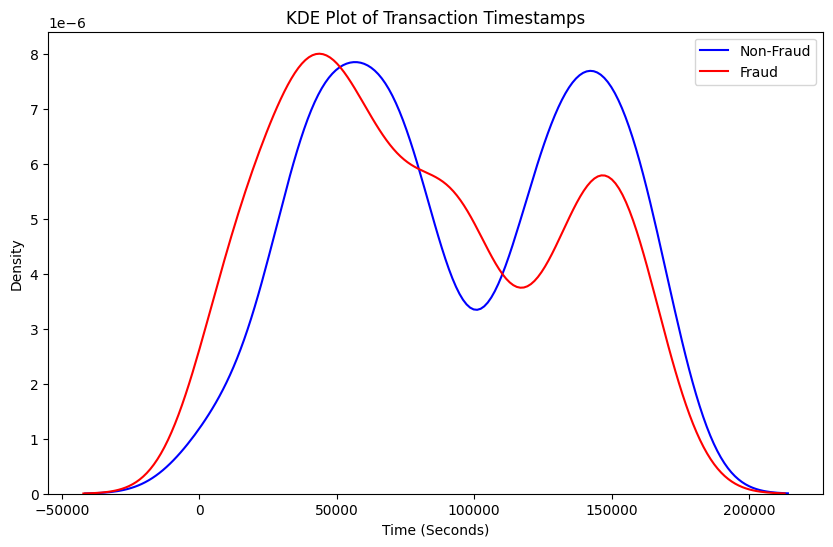

In [19]:
import seaborn as sns

# KDE plot of transaction timestamps
plt.figure(figsize=(10, 6))
sns.kdeplot(new_dataset[new_dataset['Class'] == 0]['Time'], label='Non-Fraud', color='blue')
sns.kdeplot(new_dataset[new_dataset['Class'] == 1]['Time'], label='Fraud', color='red')
plt.xlabel('Time (Seconds)')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.title('KDE Plot of Transaction Timestamps')
plt.show()


**How does the model perform on detecting fraud compared to non-fraud cases?**

We can evaluate the model's performance on detecting fraud compared to non-fraud cases using metrics like accuracy, precision, recall, and F1-score. We can find these metrics in the classification_report that we computed earlier.

In [20]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        98
           1       0.97      0.89      0.93        95

    accuracy                           0.93       193
   macro avg       0.94      0.93      0.93       193
weighted avg       0.93      0.93      0.93       193



**What features are most important for fraud detection according to the Random Forest model?**

We can extract feature importances from the trained Random Forest model to determine which features are most important for fraud detection. Here's how to do it:

This code will plot the top N most important features based on the Random Forest model's feature importances.

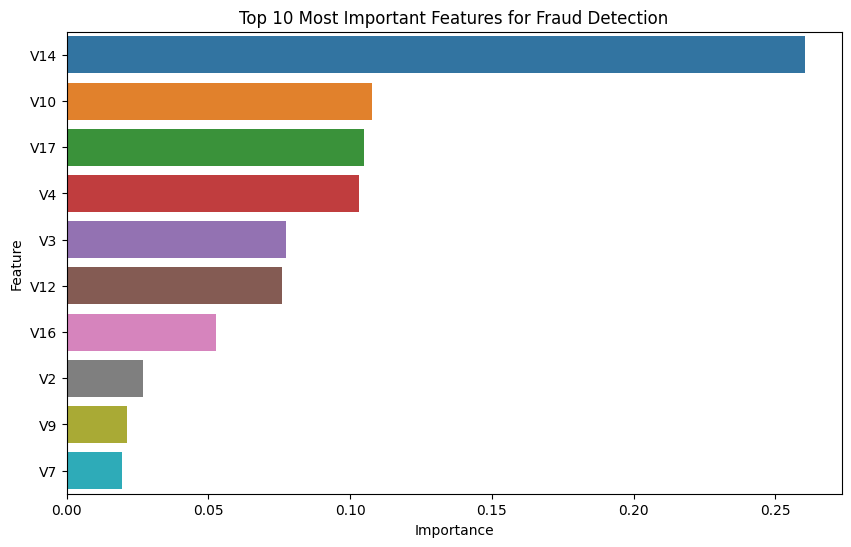

In [21]:
# Get feature importances from the Random Forest model
feature_importances = best_model.feature_importances_

# Create a DataFrame to associate feature names with importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N important features
top_n = 10  # You can change this number to show the top N features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(top_n), orient='h')
plt.title(f'Top {top_n} Most Important Features for Fraud Detection')
plt.show()


 Build and Evaluate the Decision Tree Classifier
 A **Decision Tree Regressor** predicts continuous numerical values in regression tasks, whereas a **Random Forest Classifier** predicts discrete class labels in classification tasks.

The key difference is that a Decision Tree Regressor provides continuous predictions with a single tree, while a Random Forest Classifier combines multiple decision trees to make classification predictions. Random Forests are often more robust and less prone to overfitting than individual decision trees.

In [22]:
# For Decision Tree Regressor
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Generate a classification report for Decision Tree
classification_rep_dt = classification_report(y_test, y_pred_dt)

print("\nDecision Tree Classification Report:")
print(classification_rep_dt)


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        98
           1       0.91      0.91      0.91        95

    accuracy                           0.91       193
   macro avg       0.91      0.91      0.91       193
weighted avg       0.91      0.91      0.91       193



**Compare the Classification Reports**

Now, let's compare the classification reports of the Random Forest and Decision Tree models. We can compare them based on various metrics, including precision, recall, F1-score, and support.

In [23]:
# Convert classification reports to dictionaries for easier comparison
report_rf_dict = classification_report(y_test, y_pred, output_dict=True)
report_dt_dict = classification_report(y_test, y_pred_dt, output_dict=True)

# Create a DataFrame to compare the reports
import pandas as pd

report_comparison_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Support'],
    'Random Forest': [
        report_rf_dict['0']['precision'],
        report_rf_dict['0']['recall'],
        report_rf_dict['0']['f1-score'],
        report_rf_dict['0']['support']
    ],
    'Decision Tree': [
        report_dt_dict['0']['precision'],
        report_dt_dict['0']['recall'],
        report_dt_dict['0']['f1-score'],
        report_dt_dict['0']['support']
    ]
})

# Display the comparison report
print("\nComparison of Random Forest and Decision Tree Classification Reports:")
print(report_comparison_df)



Comparison of Random Forest and Decision Tree Classification Reports:
      Metric  Random Forest  Decision Tree
0  Precision       0.904762       0.908163
1     Recall       0.969388       0.908163
2   F1-Score       0.935961       0.908163
3    Support      98.000000      98.000000
